<a href="https://colab.research.google.com/github/abhay-2108/Hotel-Review-Sentiment-Analysis/blob/main/Hotel_review_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')   # to avoid any kind of warning display
import collections
from wordcloud import WordCloud

In [54]:
data = pd.read_csv('Hotel Review.csv')

In [55]:
data.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [56]:
data.columns

Index(['address', 'categories', 'city', 'country', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.doRecommend', 'reviews.id', 'reviews.rating', 'reviews.text',
       'reviews.title', 'reviews.userCity', 'reviews.username',
       'reviews.userProvince'],
      dtype='object')

In [57]:
# Extracting columns required for sentiment analysis
df = data[['reviews.rating','reviews.text']]

In [58]:
# Taking 5K rows as we have very large dataset
df = df.sample(n=10000, random_state=42)
df.head()

,reviews.rating,reviews.text
11107,5.0,This upscale Choice property was perfect for o...
29089,3.0,I've stayed two nights for a business trip at ...
15961,1.0,From the warm greeting at check-in to the serv...
13555,2.0,Hotel is old. This might be section due to be ...
9008,3.0,"Not the nicest motel in the world, but it was ..."


In [59]:
df.rename(columns={'reviews.rating':'Rating','reviews.text':'Reviews'},inplace=True)

In [60]:
df.sample(10)  # Dataset after renaming columns

,Rating,Reviews
28723,4.0,Wonderful stay
8121,5.0,We stay here for football games. The staff has...
12782,5.0,"twin room. Excellent hotel, nicest hotel we ha..."
27692,1.0,I paid for two nights but did not stay after I...
8943,4.0,"No frills, clean hotel. Nice breakfast. Would ..."
8087,5.0,"Amazing service, great location!"
13271,4.0,I usually stay at their sister hotel across th...
24392,4.0,Great personnel. Room bed. Very good clean Bre...
35509,NaN,Great Service We got started the way many tour...
26597,4.0,Right off the Interstate highway. A good night...


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 11107 to 26718
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rating   9752 non-null   float64
 1   Reviews  9995 non-null   object 
dtypes: float64(1), object(1)
memory usage: 234.4+ KB


In [62]:
print(df['Rating'].value_counts())
print(df['Rating'].unique())

Rating
5.0     3530
4.0     2692
3.0     1589
2.0      854
1.0      827
0.0      103
10.0      25
9.6       16
9.2       14
8.8       10
4.2        9
4.8        9
4.3        8
7.9        7
4.5        6
6.3        6
7.5        5
8.3        5
6.7        4
3.4        4
5.8        3
3.1        3
3.3        3
5.4        2
3.8        2
4.4        2
2.5        2
4.6        2
4.1        2
2.9        1
1.5        1
4.9        1
1.3        1
9.5        1
4.7        1
7.1        1
2.4        1
Name: count, dtype: int64
[ 5.   3.   1.   2.   4.   0.   9.6  nan  7.5  4.8  5.4  9.2  4.3  5.8
 10.   2.9  4.5  4.2  3.3  8.8  7.9  3.8  6.7  4.9  3.4  1.3  4.1  1.5
  4.6  3.1  8.3  6.3  2.5  9.5  4.7  4.4  7.1  2.4]


In [63]:
df['Rating'].isna().sum()  # Checking the number of empty columns of rating

np.int64(248)

In [64]:
# Assign random ratings to hotel with no ratings between [1.0,5.0]

num_nan = df['Rating'].isna().sum()

if num_nan > 0:
    random_ratings = np.random.choice([1.0,2.0,3.0,4.0,5.0],size=num_nan)
    df.loc[df['Rating'].isna(),'Rating'] = random_ratings


In [65]:
df['Reviews'].iloc[0]

'This upscale Choice property was perfect for our needs It is close to downtown so that the restaurants and attractions are easy to get to. The restaurant and bar are nice, the staff are friendly and the food was good.It is not a five star restaurant, but for our needs it fit the bill. The rooms are large and very... More'

In [66]:
df.dropna(subset=['Reviews'], inplace=True)  # drop empty rows

In [67]:
df.shape  # After droping empty rows

(9995, 2)

In [68]:
df['Reviews'] = df['Reviews'].astype(str).fillna('')  #fill empty reviews

In [69]:
# Lower case all sentences
df['Reviews'] = df['Reviews'].str.lower()   # lower case all reviews

In [70]:
# Remove punctuations
import string
exclude = string.punctuation
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [71]:
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
    return text

df['Reviews'] = df['Reviews'].apply(remove_punc)  # Removing punctuation from dataset

In [72]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word not in stopwords.words('english'): # Keep words that are NOT stopwords
            new_text.append(word)
    return " ".join(new_text)

In [74]:
# Apply the corrected remove_stopwords function
df['Reviews'] = df['Reviews'].astype(str).apply(remove_stopwords)

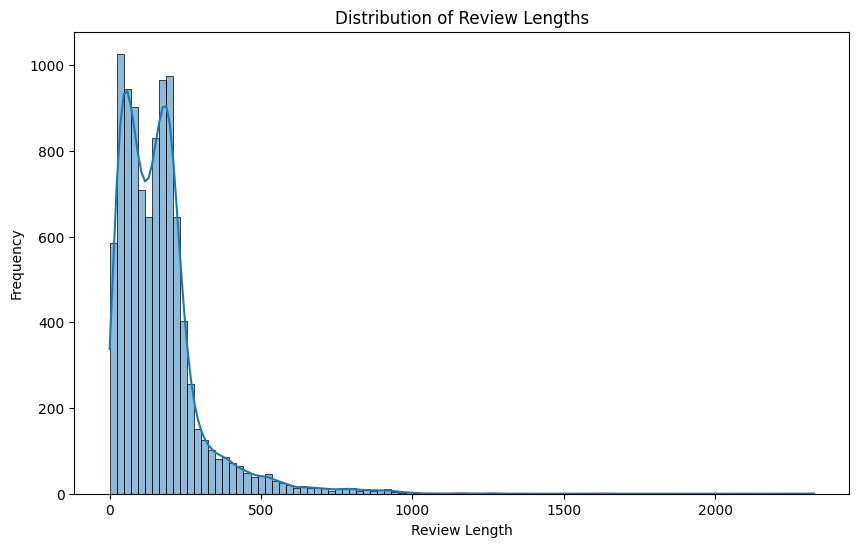

In [75]:
# Calculate review lengths
df['ReviewLength'] = df['Reviews'].apply(len)

# Visualize distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['ReviewLength'], bins=100, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

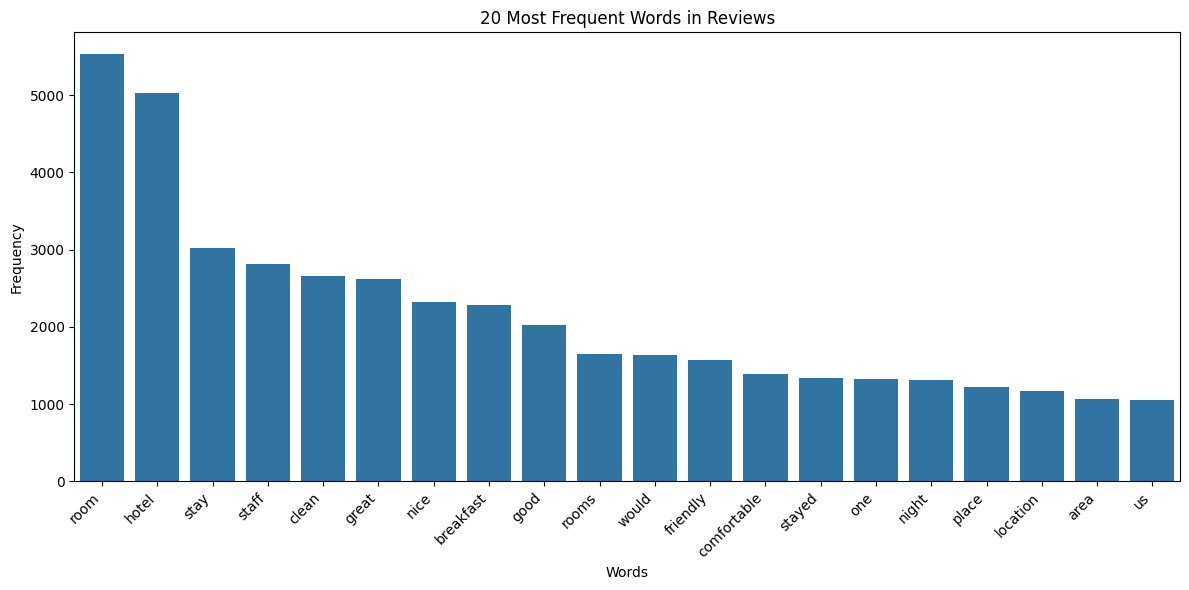

In [76]:
# Most frequent words
all_words = ' '.join(df['Reviews']).split()
word_counts = collections.Counter(all_words)
most_common_words = word_counts.most_common(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.xticks(rotation=45, ha='right')
plt.title('20 Most Frequent Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

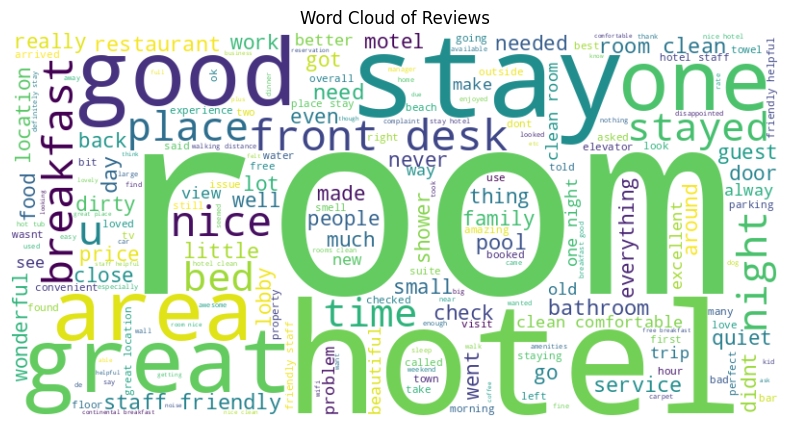

In [77]:
# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Reviews']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [78]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [79]:
# performing sentiment analysis to each review
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# Download the vader_lexicon resource
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df['Sentiment'] = df['Reviews'].apply(lambda review: sia.polarity_scores(review)['compound'])

# Classify sentiment as positive, negative, or neutral
df['Sentiment_Category'] = df['Sentiment'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

print(df[['Reviews', 'Sentiment', 'Sentiment_Category']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                 Reviews  Sentiment  \
11107  upscale choice property perfect needs close do...     0.9509   
29089  ive stayed two nights business trip hotel staf...     0.7096   
15961  warm greeting checkin service breakfast visit ...     0.9134   
13555  hotel old might section due torn would proper ...     0.6808   
9008   nicest motel world clean towels pretty scratch...     0.8689   

      Sentiment_Category  
11107           Positive  
29089           Positive  
15961           Positive  
13555           Positive  
9008            Positive  


In [80]:
df['Sentiment_Category'].value_counts()

,count
Sentiment_Category,
Positive,7854
Negative,1366
Neutral,775


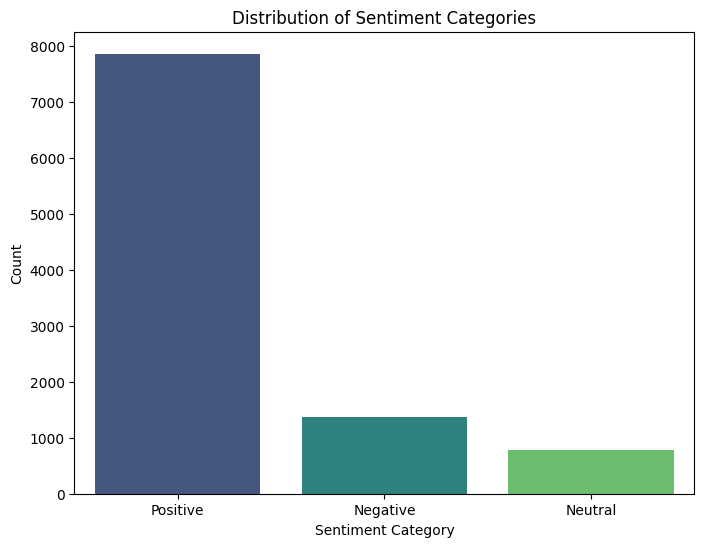

In [81]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_Category', data=df, palette='viridis')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

In [82]:
from transformers import pipeline

pipeline_sentiment = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")  # transformer llm for sentiment analysis
df['Transfomer_Score'] = df['Reviews'].apply(lambda review: pipeline_sentiment(review)[0]['score'])
df['Transfomer_Sentiment'] = df['Reviews'].apply(lambda review: pipeline_sentiment(review)[0]['label'].lower())


Device set to use cpu


In [83]:
df['Transfomer_Sentiment'].value_counts()

,count
Transfomer_Sentiment,
positive,5729
negative,4266


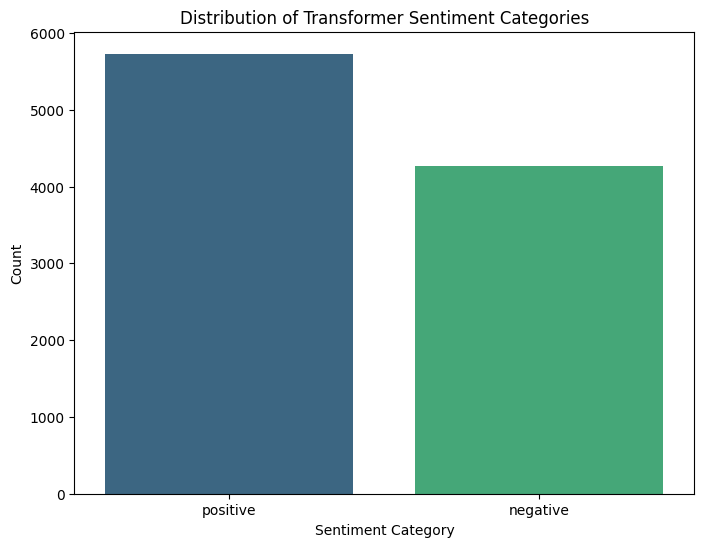

In [84]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Transfomer_Sentiment', data=df, palette='viridis')
plt.title('Distribution of Transformer Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

In [85]:
df.sample(6)

,Rating,Reviews,ReviewLength,Sentiment,Sentiment_Category,Transfomer_Score,Transfomer_Sentiment
1972,5.0,wife stayed 2 nights happily surprised size ro...,182,0.9799,Positive,0.999548,positive
27183,4.0,stayed night tugaloo triathlon started breakfa...,88,0.5719,Positive,0.995778,positive
284,5.0,perfect place stay first time ever mobile woul...,211,0.9371,Positive,0.997732,positive
14696,1.0,first got room tv cords ripped tv tv wet towel...,255,-0.1280,Negative,0.997921,negative
21105,2.0,room lots holes walls patched hard scratchy to...,118,-0.2732,Negative,0.997959,negative
34287,4.0,royal dutch inn open summer months due extreme...,170,0.0000,Neutral,0.875961,negative


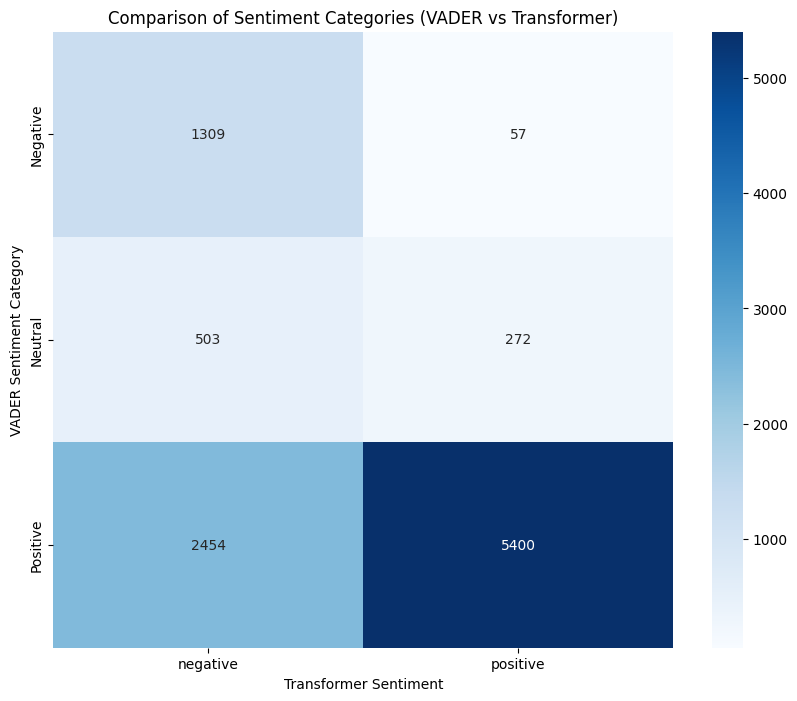

In [86]:
# compare Sentiment_category and Transformer_Sentiment

pd.crosstab(df['Sentiment_Category'], df['Transfomer_Sentiment'])
plt.figure(figsize=(10, 8))
sns.heatmap(pd.crosstab(df['Sentiment_Category'], df['Transfomer_Sentiment']), annot=True, fmt='d', cmap='Blues')
plt.title('Comparison of Sentiment Categories (VADER vs Transformer)')
plt.xlabel('Transformer Sentiment')
plt.ylabel('VADER Sentiment Category')
plt.show()